# Ayudantía Algoritmos de Segmentación - Python

## Natalie Julian 

La  base de datos Mall_customer contiene datos de clientes de un centro comercial (mall). El equipo de Marketing está interesado en comprender cuántos perfiles de clientes existen de modo de enfocar a cada perfil de cliente una estrategia personalizada. Por ejemplo, para el perfil de clientes que suele comprar menos, incentivarlos a comprar con súperofertas u otros.

Los atributos registrados para cada cliente se describen a continuación:

- CustomerID: Id del cliente 
- Gender: Sexo del cliente
- Age: Edad del cliente
- Annual Income (k$): Ingreso anual del cliente
- Spending Score (1-100): Score asignado al cliente dependiendo de la naturaleza del gasto (lo que compra)

### a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el análisis pero importante en el contexto? ¿Por qué?. Además, determine si existen casos faltantes en la base de datos y revise que las variables tengan rangos factibles (Ejemplo: Que la edad no sea 10000).

#### Cargar la base de datos

In [155]:
pd.read_csv('Mall_Customers.csv')  #La columna CustomerID podríamos usarla como índice

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Determinar columnas que no aportan al modelo pero son valiosas en el contexto

In [156]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv', index_col=0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [157]:
data.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


#### Determinar si existen datos faltantes 

In [158]:
data.info() #No vemos ninguna celda vacía, pero en algunos casos podría pasar que los NA se hayan tipeado con algún símbolo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [159]:
# pip install missingno  #para instalar missingno, que ya habiamos istalado anteriormente

<AxesSubplot:>

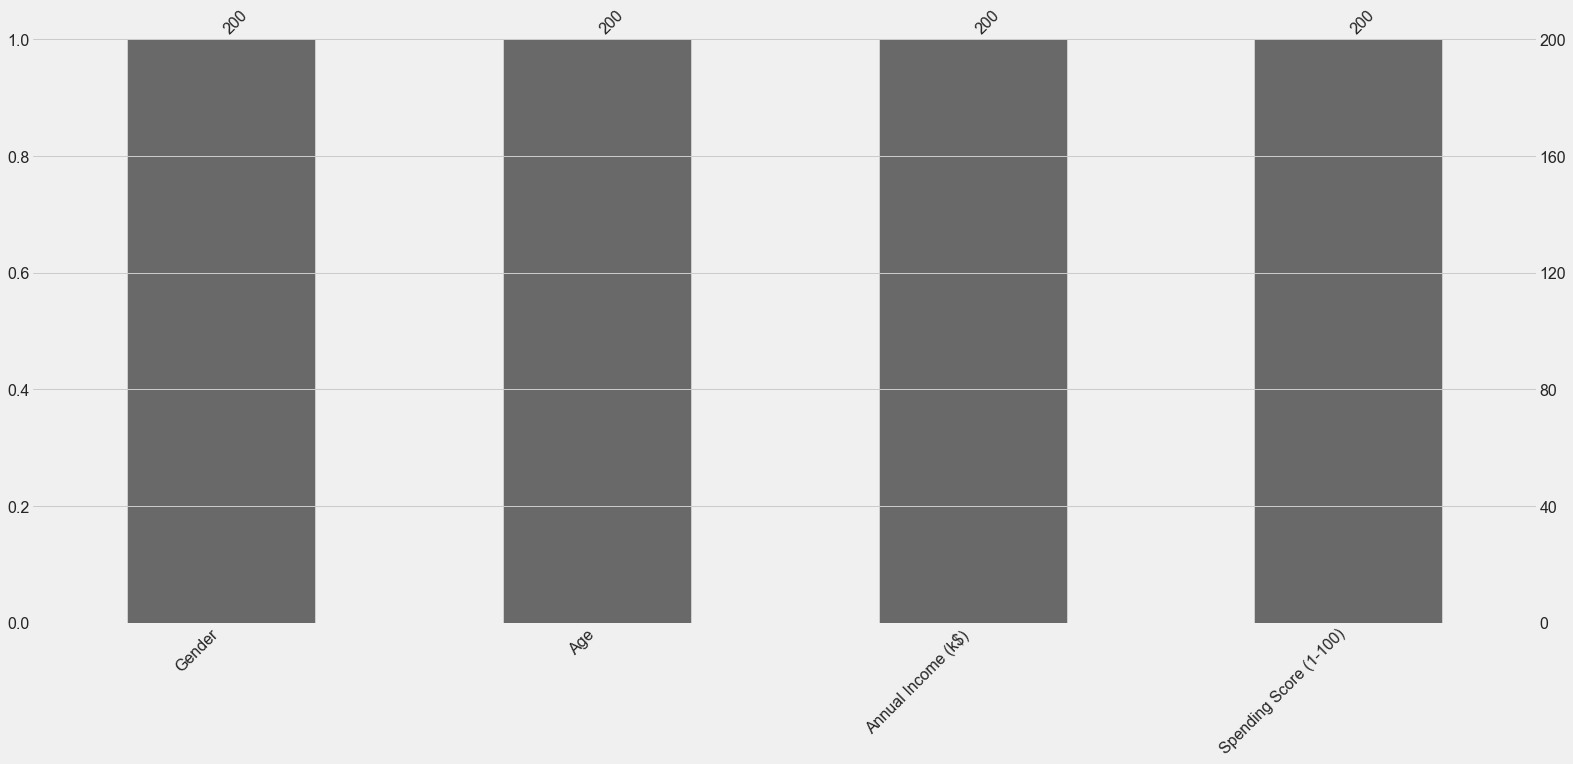

In [160]:
import missingno as msno
msno.bar(data) #Muestra la proporción y cantidad de datos completos por variable

In [161]:
#pip install plotly #para instalar plotly en la máquina

In [162]:
import plotly as plotly #Cargamos plotly en la sesión actual

In [163]:
import plotly.figure_factory as ff
import plotly.offline as py
desc = ff.create_table(data)
py.iplot(desc) #Podemos recorrer los registros de la base de datos

#### Revisar que los rangos de las variables sean aceptables 

In [164]:
data.describe() 

#La edad se mueve entre 18 y 70 años, lo cual es totalmente factible

#El sueldo se mueve en valores positivos, lo cual también es factible (si fuera negativo sería extraño)

#El Spending Score (1-100) efectivamente se mueve entre 1 y 99, por lo tanto es factible

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Es necesario revisar todos estos aspectos al manejar una base de datos:

- Si la base posee ID, nombre, rut, o demasiados datos personales que no sirven para el análisis, omitirlos y quedarnos solo con el Código de ID de modo de posteriormente linkear con dicho ID. También es posible fijarla como índice en Python.


- Determinar si existen celdas vacías o códigos extraños en las celdas (a veces los vacíos se llenan con guión, No aplica, Indeterminado, u otro).


- Determinar si las variables se mueven en intervalos posibles (en algunos casos, los vacíos se llenan con un número, por ejemplo, 99, 0, u otros, esto debe detectarse con cuidado e idealmente manejar un diccionario de la base de datos a ocupar).


### b) Nos interesa determinar perfiles o grupos de modo que logremos describir cada grupo y aplicar una estrategia de marketing apropiada a cada uno. En base a las variables que tenemos, ¿qué algoritmo de agrupación sería el más apropiado si queremos utilizar todas las variables?

Tenemos 1 variable género que es categórica y tres variables numéricas. Si queremos utilizar todas las variables el algoritmo más apropiado sería K-Prototype, ya que nos encontramos en un caso de mezcla de categóricas y cuantitativas.

### c) Observe cómo se distribuye la cantidad de mujeres y hombres en la base de datos. En base a los resultados, ¿cree usted que la variable género puede aportar información en la agrupación? ¿En qué casos quizás no aporte mucha información esta variable?. Discuta.

#### Tabla de frecuencias según variable Gender

In [165]:
temp = data["Gender"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})

print(df)

   labels  values
0  Female     112
1    Male      88


#### Gráfico de torta 

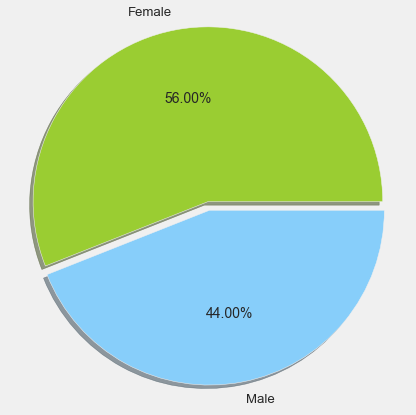

In [166]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue']
plt.pie(sizes, colors=colors, labels=labels, explode=[0, 0.05], shadow=True, autopct = '%.2f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Gráfico de barras

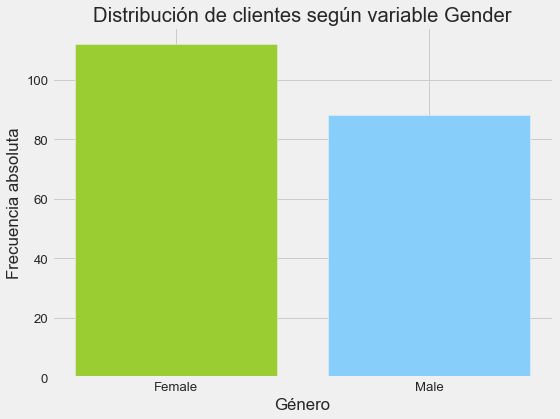

In [167]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.bar(labels, sizes, color=colors)

plt.title('Distribución de clientes según variable Gender')
plt.xlabel('Género')
plt.ylabel('Frecuencia absoluta')
plt.show()

La variable Gender se encuentra bastante repartida en ambos grupos, es decir, tenemos varios registros para ambos casos, Female y Male, por lo tanto la variable puede aportar información a la agrupación. Es relevante notar esto porque pudiera pasar que quizás toda nuestra base de datos (o una gran parte) se concentre demasiado en una categoría y por lo tanto tener o no tener esa variable no aporte tanto (ya que lo que hacemos para agrupar es calcular distancias/disimilitud, si todos los clientes son hombres, tendrían todos disimilitud 0 en la variable gender).

### d) Realice histogramas de las variables numéricas. ¿Cómo se distribuyen las observaciones en cada caso? ¿Por qué puede ser importante al realizar agrupación en base a distancias, observar el rango de las variables?

C:\Users\Naty\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Naty\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



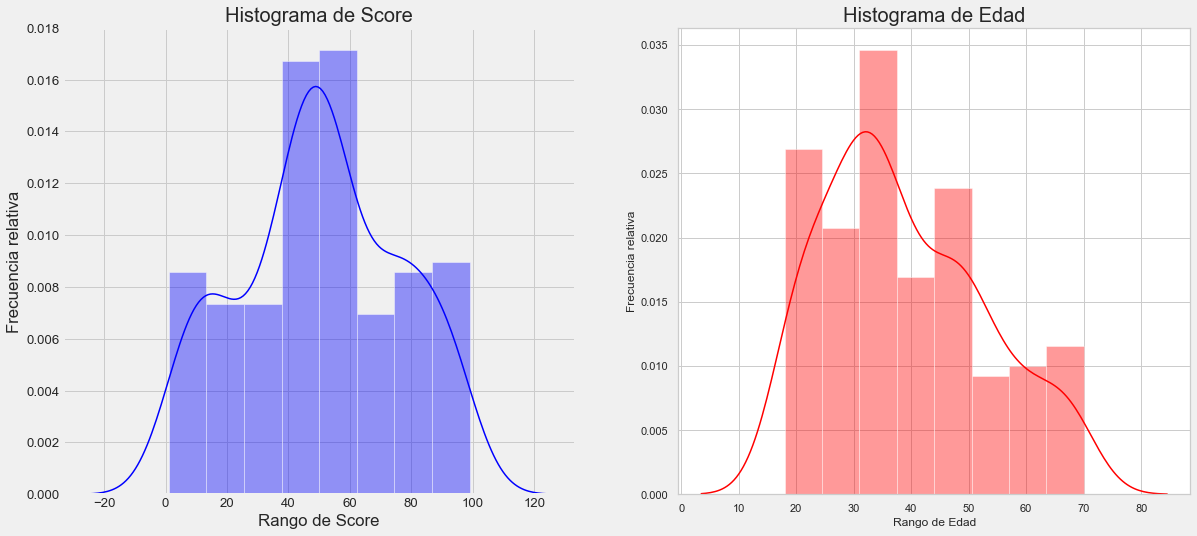

C:\Users\Naty\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



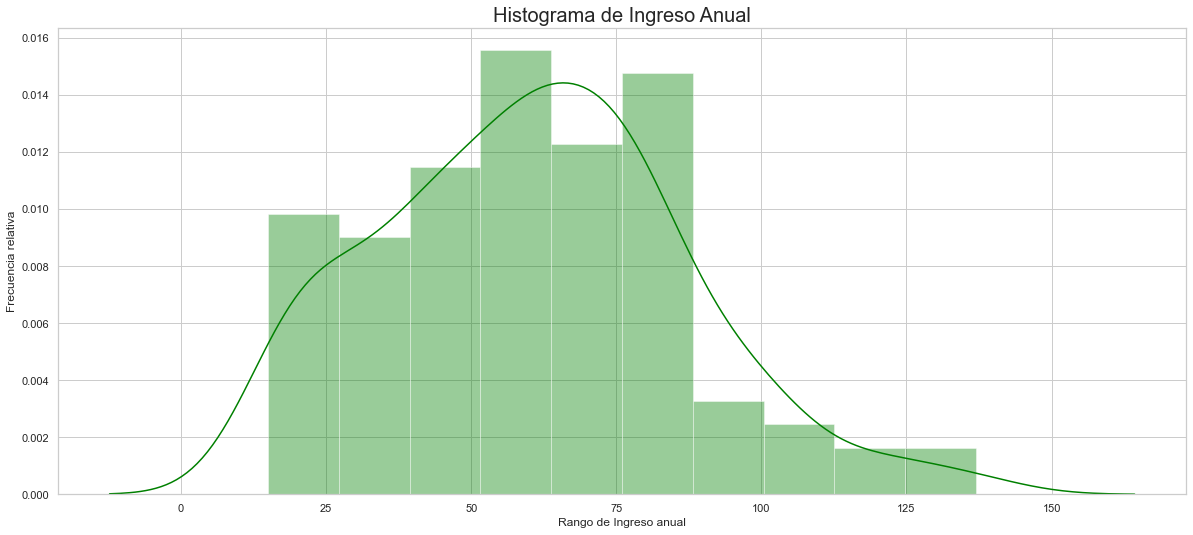

In [168]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'], color = 'blue')
plt.title('Histograma de Score', fontsize = 20)
plt.xlabel('Rango de Score')
plt.ylabel('Frecuencia relativa')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Histograma de Edad', fontsize = 20)
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia relativa')
plt.show()


sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'], color='green')
plt.title('Histograma de Ingreso Anual', fontsize = 20)
plt.xlabel('Rango de Ingreso anual')
plt.ylabel('Frecuencia relativa')

plt.show()

Cuando queremos agrupar queremos establecer grupos generalizables y representativos de las observaciones que caigan dentro de él. Al realizar agrupación es super importante fijarse en dos cosas:

- Que al ingresar las variables numéricas al algoritmo de agrupación, estas se encuentren estandarizadas
- Que no existan observaciones atípicas o extremas ya que alterarán los cálculos de distancia y afectarán a los centroides


En este caso, se observa que la mayoría de las observaciones se encuentran en el centro y pocas en los extremos. De todas formas, la detección de anomalías la estudiaremos en la siguiente clase :D

### e)  Estandarice las variables pertinentes y recodifique las variables categóricas. Determine en base al método de Elbow cuántos grupos utilizar en un algoritmo de K-Prototype.

#### Estandarización de las variables numéricas

In [169]:
data.drop(['Gender'], axis=1).columns #Nombre de las variables a estandarizar

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [170]:
import numpy as np
columns_to_standarice     = data.drop(['Gender'], axis=1).columns
data[columns_to_standarice] = data[columns_to_standarice].apply(lambda x: (x - x.mean()) / np.std(x))

print(data)

            Gender       Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                              
1             Male -1.424569           -1.738999               -0.434801
2             Male -1.281035           -1.738999                1.195704
3           Female -1.352802           -1.700830               -1.715913
4           Female -1.137502           -1.700830                1.040418
5           Female -0.563369           -1.662660               -0.395980
...            ...       ...                 ...                     ...
196         Female -0.276302            2.268791                1.118061
197         Female  0.441365            2.497807               -0.861839
198           Male -0.491602            2.497807                0.923953
199           Male -0.491602            2.917671               -1.250054
200           Male -0.635135            2.917671                1.273347

[200 rows x 4 columns]


#### Categorización de la variable Gender

In [171]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['Gender_num'] = LE.fit_transform(data['Gender']) #1 es male y 0 mujer

print(data)

            Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                                 
1             Male -1.424569           -1.738999               -0.434801   
2             Male -1.281035           -1.738999                1.195704   
3           Female -1.352802           -1.700830               -1.715913   
4           Female -1.137502           -1.700830                1.040418   
5           Female -0.563369           -1.662660               -0.395980   
...            ...       ...                 ...                     ...   
196         Female -0.276302            2.268791                1.118061   
197         Female  0.441365            2.497807               -0.861839   
198           Male -0.491602            2.497807                0.923953   
199           Male -0.491602            2.917671               -1.250054   
200           Male -0.635135            2.917671                1.273347   

           

#### Determinar posibles valores de K (cantidad de grupos)

In [172]:
X=data.drop(['Gender'], axis=1)

print(X)

                 Age  Annual Income (k$)  Spending Score (1-100)  Gender_num
CustomerID                                                                  
1          -1.424569           -1.738999               -0.434801           1
2          -1.281035           -1.738999                1.195704           1
3          -1.352802           -1.700830               -1.715913           0
4          -1.137502           -1.700830                1.040418           0
5          -0.563369           -1.662660               -0.395980           0
...              ...                 ...                     ...         ...
196        -0.276302            2.268791                1.118061           0
197         0.441365            2.497807               -0.861839           0
198        -0.491602            2.497807                0.923953           1
199        -0.491602            2.917671               -1.250054           1
200        -0.635135            2.917671                1.273347           1

In [173]:
from kmodes.kprototypes import KPrototypes

[]

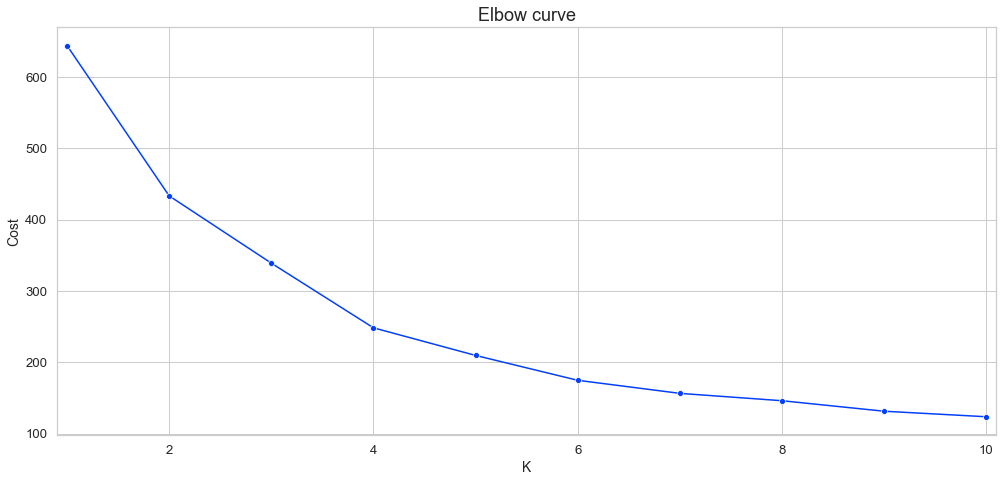

In [174]:
cost = []
for num_clusters in list(range(1,11)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(X, categorical=[3])
    cost.append(kproto.cost_)

import seaborn as sns
sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=range(1,11), y=cost, marker="o", dashes=False)
ax.set_title('Elbow curve', fontsize=18)
ax.set_xlabel('K', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)
ax.set(xlim=(1-0.1, 10+0.1))
plt.plot()

Note que desde 2 hasta 4 grupos la caida es fuerte y a una misma 'velocidad' pero ya después la caída enlentece. Como tenemos 200 clientes, probaría 3 grupos, 2 posiblemente sean muy pocos y se puedan concentrar demasiado en un grupo. De todas formas, en la práctica podemos recibir el input del equipo de Marketing, que con antecedentes previos nos pueden dar luz de cuántos grupos se esperarían.

#### f) Añada el grupo al que pertenece cada cliente con su K propuesto, ¿de qué tamaño es cada grupo? Comente. Obtenga los centroides, ¿cómo describiría a los clientes que se encuentran en cada grupo?

In [175]:
# K=3
kproto = KPrototypes(n_clusters=K, init='Cao')
data['cluster_id']= kproto.fit_predict(X, categorical=[3])

print(data)

            Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                                 
1             Male -1.424569           -1.738999               -0.434801   
2             Male -1.281035           -1.738999                1.195704   
3           Female -1.352802           -1.700830               -1.715913   
4           Female -1.137502           -1.700830                1.040418   
5           Female -0.563369           -1.662660               -0.395980   
...            ...       ...                 ...                     ...   
196         Female -0.276302            2.268791                1.118061   
197         Female  0.441365            2.497807               -0.861839   
198           Male -0.491602            2.497807                0.923953   
199           Male -0.491602            2.917671               -1.250054   
200           Male -0.635135            2.917671                1.273347   

           

In [176]:
data['cluster_id'].value_counts() #Cantidad de famosos por clúster

1    96
0    70
2    34
Name: cluster_id, dtype: int64

No hay ningún grupo muy grande o muy pequeño, por lo general, si un grupo es muy pequeño puede ocurrir que el $K$ utilizado es muy grande para la cantidad de registros o también puede ocurrir que corresponda a un clúster de observaciones atípicas o extremas.

In [177]:
print(X.columns)

print(kproto.cluster_centroids_)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_num'], dtype='object')
[[ 0.95090864 -0.54538662 -0.40429883  0.        ]
 [-0.75474635  0.01997533  0.75451321  0.        ]
 [ 0.17329545  1.06645385 -1.2980103   1.        ]]


El primer clúster posee clientes de mayor edad, principalmente mujeres, con bajos ingresos, con nivel medio de compras. 

El segundo clúster posee clientes más jóvenes, principalmente mujeres, con medianos ingresos pero con alto nivel de compras.

El tercer clúster posee clientes de mediada edad, principalmente hombres, con altos ingresos anuales pero bajo nivel de compras.


Esto puede ser de mucha utilidad a la hora de querer capturar mejor la atención de los clientes, ya que los clientes de perfil 1, 2 o 3 son diferentes. Al tercer grupo de clientes (los clientes más difíciles, cautelosos) se les podría enviar solo las mejores ofertas, las top sellers y quizás ofrecer algún descuento extra para tratar de 'capturarlos'. Al grupo 1 que ya compra pero que puede comprar más, se le puede ofrecer descuentos en ciertas categorías, para que siga comprando. Al grupo 2 se le puede premiar por su buen comportamiento en compra, duplicando sus puntos o regalándole un viaje gratis, de modo de premiar que es un buen cliente (y que siga así).

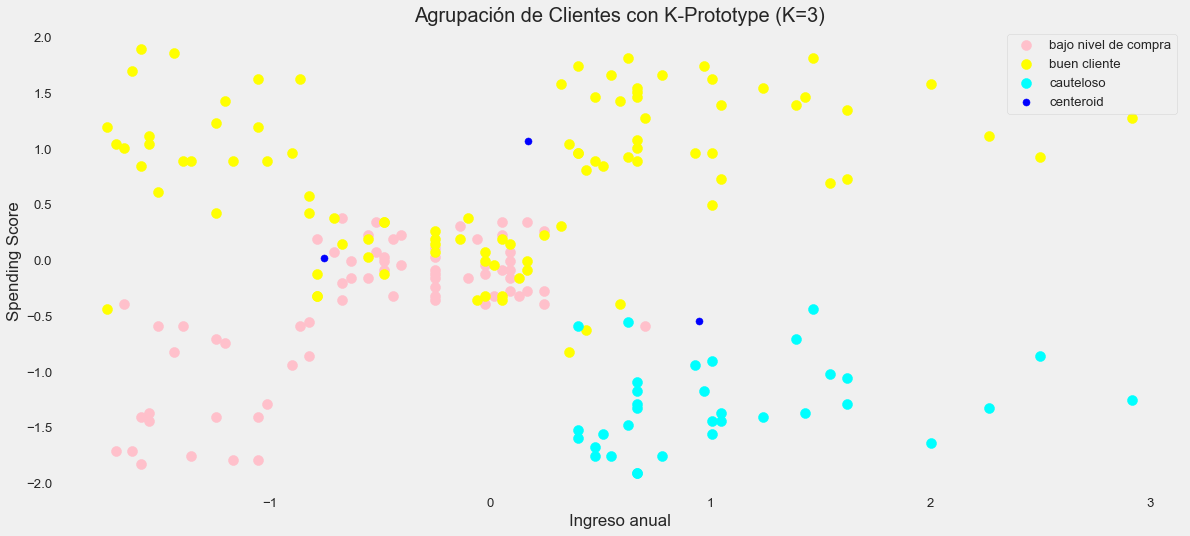

In [179]:
plt.scatter(data[data.cluster_id == 0]['Annual Income (k$)'], data[data.cluster_id == 0]['Spending Score (1-100)'], s = 100, c = 'pink', label = 'bajo nivel de compra')
plt.scatter(data[data.cluster_id == 1]['Annual Income (k$)'], data[data.cluster_id == 1]['Spending Score (1-100)'], s = 100, c = 'yellow', label = 'buen cliente')
plt.scatter(data[data.cluster_id == 2]['Annual Income (k$)'], data[data.cluster_id == 2]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'cauteloso')
plt.scatter(kproto.cluster_centroids_[:,0], kproto.cluster_centroids_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Agrupación de Clientes con K-Prototype (K=3)', fontsize = 20)
plt.xlabel('Ingreso anual')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Pregunta abierta: ¿Por qué al correr todo de nuevo, los grupos cambian? 

### Tarea: Probar con más grupos! 

# Gracias!! y Mucho ánimo :D